# **Name - PRABHAKAR KUMAR**
# **Roll - IRM2017008**
# **Assignment 8 - Self Organizing Neural Network**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# **Training Data - 1500 two-dimensional input vectors generated randomly in a square region in the interval between -1 and +1**

In [2]:
X = np.random.uniform(-1,1,(1500,2))
print(X.shape)
print(X)

(1500, 2)
[[-0.3027771  -0.34014863]
 [-0.86527756 -0.35323805]
 [-0.9271204   0.50151329]
 ...
 [ 0.72616983 -0.75137901]
 [ 0.36111274  0.88179663]
 [-0.08430664 -0.87560041]]


# **Generating Kohonen Layer containing 100 neurons, with initial synaptic weights randomly in the interval -1 to +1**

In [4]:
W = np.random.uniform(-1,1,(100,2))
print(W.shape)

(100, 2)


In [5]:
print(W)

[[-5.57882212e-01  4.12812383e-01]
 [-2.58221229e-01 -1.54270350e-01]
 [-1.22092093e-01  7.70709136e-01]
 [-1.63796135e-01  5.80992180e-01]
 [-8.50538805e-01  5.34246829e-02]
 [ 3.76536471e-01 -5.00078593e-01]
 [-6.33074831e-01 -4.07233921e-01]
 [ 4.37265805e-01 -6.96975988e-01]
 [ 9.16362695e-02  7.62080979e-01]
 [ 6.24619473e-01  8.67031332e-01]
 [-6.27366922e-01  3.08508596e-01]
 [ 6.58410362e-03  9.17165792e-01]
 [ 1.81647460e-01  6.34010897e-01]
 [ 3.99999749e-02  2.34474389e-01]
 [-1.22765303e-01 -8.21180086e-01]
 [ 8.25259626e-01 -3.08131305e-01]
 [-7.15369957e-01  7.56406353e-01]
 [ 8.54623249e-01 -7.70773125e-01]
 [-9.01858546e-01 -9.29602939e-01]
 [-6.30998153e-01 -1.14338841e-01]
 [-8.12489271e-01 -5.47125126e-01]
 [-3.42988226e-01  3.11194142e-01]
 [-1.28926772e-01 -4.35284185e-01]
 [ 5.13677698e-01 -6.16370633e-01]
 [ 8.94603282e-01  8.48137497e-01]
 [ 2.15732539e-01  5.68860048e-01]
 [-5.95666036e-01 -4.85072397e-01]
 [ 5.23188329e-01 -3.01560939e-01]
 [ 2.51235444e-01  9

# **Learning Rate Parameter = 0.1**
# **Neighbourhood Radius = 0.2**

In [7]:
alpha = 0.1
r = 0.2

# **Distribution of Randomly Genrated Initial Synaptic Weights**

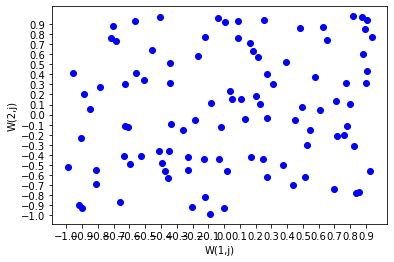

In [8]:
plt.plot(W[:,0], W[:,1], 'bo')
plt.xticks(np.arange(-1, 1, step=0.1))
plt.yticks(np.arange(-1, 1, step=0.1))
plt.xlabel("W(1,j)")
plt.ylabel("W(2,j)")
plt.show()

# **Training**

In [9]:
def inNeighbour(winner,other):
    if (other[0]>winner[0]-r and other[0]<winner[0]+r) and (other[1]>winner[1]-r and other[1]<winner[1]+r):
        return True
    else:
        return False

In [10]:
epochs = 100

In [11]:
for i in range(epochs):
    for inputVector in X:
        minDis = 99
        winnerNeuron = 0
        for j in range(W.shape[0]):
            dis = (((inputVector[0]-W[j][0])**2)+((inputVector[1]-W[j][1])**2))**0.5
            if dis < minDis:
                winnerNeuron = j
                minDis = dis
        for k in range(W.shape[0]):
            if k!=winnerNeuron and inNeighbour(W[winnerNeuron],W[k]):
                W[k][0] += alpha*(inputVector[0]-W[k][0])
                W[k][1] += alpha*(inputVector[1]-W[k][1])
        W[winnerNeuron][0] += alpha*(inputVector[0]-W[winnerNeuron][0])
        W[winnerNeuron][1] += alpha*(inputVector[1]-W[winnerNeuron][1])

In [12]:
print(W)

[[-0.48480891  0.21030329]
 [-0.25492048 -0.12065185]
 [ 0.04439768  0.85018159]
 [-0.27280988  0.47366988]
 [-0.8571507  -0.14426215]
 [ 0.36261869 -0.76032732]
 [-0.39287123 -0.782236  ]
 [ 0.36261869 -0.76032732]
 [ 0.04439768  0.85018159]
 [ 0.46968789  0.82051195]
 [-0.85175013  0.3545431 ]
 [ 0.04439768  0.85018159]
 [ 0.04439768  0.85018159]
 [-0.13217283  0.15338992]
 [-0.0376432  -0.81894343]
 [ 0.828775   -0.3816163 ]
 [-0.74424937  0.74795159]
 [ 0.81174434 -0.76612424]
 [-0.7166892  -0.85329033]
 [-0.57882235 -0.24036486]
 [-0.8196299  -0.57653082]
 [-0.48480891  0.21030329]
 [-0.0376432  -0.81894343]
 [ 0.36261869 -0.76032732]
 [ 0.82130126  0.84440046]
 [ 0.04439768  0.85018159]
 [-0.39287123 -0.782236  ]
 [ 0.40696881 -0.38036391]
 [ 0.04439768  0.85018159]
 [-0.48480891  0.21030329]
 [ 0.25511426 -0.03310151]
 [-0.25492048 -0.12065185]
 [-0.74424937  0.74795159]
 [-0.0376432  -0.81894343]
 [ 0.828775   -0.3816163 ]
 [ 0.72906825 -0.05003889]
 [ 0.84752023  0.42035522]
 

# **Distribution of Synaptic Weightis after Training**

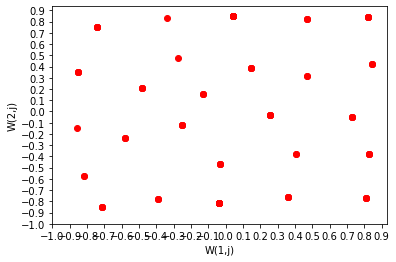

In [13]:
plt.plot(W[:,0], W[:,1], 'ro')
plt.xticks(np.arange(-1, 1, step=0.1))
plt.yticks(np.arange(-1, 1, step=0.1))
plt.xlabel("W(1,j)")
plt.ylabel("W(2,j)")
plt.show()

In [14]:
np.unique(W,axis=0).shape

(26, 2)

Here, we can see that 100 points on map got reduced to 26 points after traning.

# **Testing**

In [16]:
testData = [[0.1,0.8],[0.5,-0.2],[-0.8,-0.9],[-0.6,0.9]]
testData = np.asarray(testData)
outputNeuron = []
for inputVector in testData:
    minDis = 99
    winnerNeuron = 0
    for j in range(W.shape[0]):
        dis = (((inputVector[0]-W[j][0])**2)+((inputVector[1]-W[j][1])**2))**0.5
        if dis < minDis:
            winnerNeuron = j
            minDis = dis
    outputNeuron.append(W[winnerNeuron])
outputNeuron = np.asarray(outputNeuron)

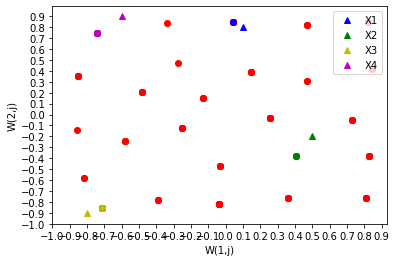

In [17]:
colour = {0:'b',1:'g',2:'y',3:'m'}

plt.plot(W[:,0], W[:,1], 'ro')
for i in range(testData.shape[0]):
    plt.plot(testData[i][0],testData[i][1],colour[i]+'^',label='X'+str(i+1))
    plt.plot(outputNeuron[i][0],outputNeuron[i][1],colour[i]+'o')
plt.xticks(np.arange(-1, 1, step=0.1))
plt.yticks(np.arange(-1, 1, step=0.1))
plt.legend(loc=1)
plt.xlabel("W(1,j)")
plt.ylabel("W(2,j)")
plt.show()